# 🏠 Machine Learning Analysis of Housing Data with Linear & Logistic Regression

## 📄 Overview
This project uses **Linear Regression** and **Logistic Regression** to analyze housing data and predict house prices. Linear Regression predicts the **expected sale price**, while Logistic Regression classifies houses as **above or below the median price**. The analysis provides actionable insights for **buyers, sellers, and investors**.  

---

## 🛠 Features Used
The model focuses on **key features** that impact house prices:

- 🏗 `OverallQual` – Overall quality of the house  
- 📏 `GrLivArea` – Above-ground living area in square feet  
- 🚗 `GarageCars` – Number of cars that fit in the garage  
- 🏠 `TotalBsmtSF` – Total basement square footage  
- 🛁 `FullBath` – Number of full bathrooms  
- 📅 `YearBuilt` – Year the house was built  
- 🏡 `TotRmsAbvGrd` – Total rooms above ground  
- 🔥 `Fireplaces` – Number of fireplaces  
- 🌳 `LotArea` – Lot size  
- 📍 `Neighborhood` – Location of the house  

---

## 📊 Methodology

### Linear Regression
- Predicts the **exact sale price** of a house.  
- Evaluated using **RMSE (Root Mean Squared Error)**.  
- Example Insight:  
  - 💰 Predicted SalePrice: **$222,925** → Above the median, likely a **premium home**.  
  - 💸 Predicted SalePrice: **$153,402** → Below the median, a **moderately priced home**.  

### Logistic Regression
- Classifies houses as **High Price (above median)** or **Low Price (below median)**.  
- Evaluated using **accuracy score**.  
- ✅ Example Accuracy: **93.15%**, showing the model reliably distinguishes premium vs. affordable homes.

---

## 📈 Visualizations
The project includes **visualizations for predicted prices**, comparing individual houses to the **median price**.

```python
plt.bar(['Median Price', 'Predicted Price'], [median_price, predicted_price2], color=['gray', 'skyblue'])

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("housing_train.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460.0,NaN,NaN,NaN,6.321918,2.703626,1.0,5.0,6.0,8.0,12.0
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [7]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [8]:
ordinal_maps = {
    "ExterQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "ExterCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "BsmtQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "BsmtCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "BsmtExposure": {"Gd":4, "Av":3, "Mn":2, "No":1, np.nan:0},
    "BsmtFinType1": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, np.nan:0},
    "BsmtFinType2": {"GLQ":6, "ALQ":5, "BLQ":4, "Rec":3, "LwQ":2, "Unf":1, np.nan:0},
    "HeatingQC": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "KitchenQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1},
    "FireplaceQu": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "GarageQual": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "GarageCond": {"Ex":5, "Gd":4, "TA":3, "Fa":2, "Po":1, np.nan:0},
    "PoolQC": {"Ex":4, "Gd":3, "TA":2, "Fa":1, np.nan:0},
}

In [9]:
for col, mapping in ordinal_maps.items():
    if col in df.columns:
        df[col] = df[col].map(mapping).astype(int)

df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0).astype(int)

In [10]:
float_cols = ["LotFrontage", "MasVnrArea"]
df[float_cols] = df[float_cols].astype(float)

object_cols = df.select_dtypes(include=["object"]).columns
df[object_cols] = df[object_cols].astype("category")

df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
Length: 81, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

# Create a Target for Logistic Regression

In [12]:
median_price = df['SalePrice'].median()
df['HighPrice'] = (df['SalePrice'] > median_price).astype(int)

# Select Features

In [13]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 
            'FullBath', 'YearBuilt', 'TotRmsAbvGrd', 'Fireplaces', 
            'LotArea', 'Neighborhood']

X = df[features] 
y_reg = df['SalePrice']  # Linear Regression target
y_clf = df['HighPrice']  # Logistic Regression target

categorical_features = ['Neighborhood']
numeric_features = [f for f in features if f not in categorical_features]


# Preprocess the Data

> Scale numeric features → make them similar scale.

> Encode categorical features → convert text into numbers.

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_reg, y_test_reg, y_train_clf, y_test_clf = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=42
)

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train_clf)

# Make predictions
y_pred_clf = log_model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Logistic Regression Accuracy: {accuracy:.2%}")

Logistic Regression Accuracy: 93.15%


# Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np 

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_reg)

# Predict
y_pred_reg = lr_model.predict(X_test_scaled)

# Evaluate 
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f"Linear Regression RMSE: ${rmse:,.2f}")


Linear Regression RMSE: $36,330.79


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [32]:
features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "YearBuilt"]
X = df[features]
y = df["SalePrice"]

X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 39763.2952657807


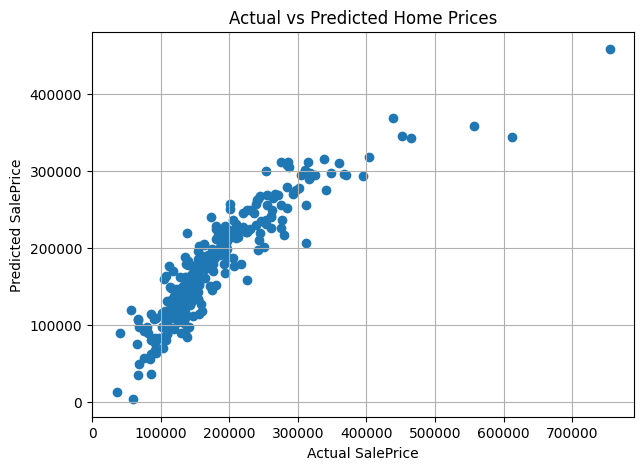

In [30]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Home Prices")
plt.grid(True)
plt.show()


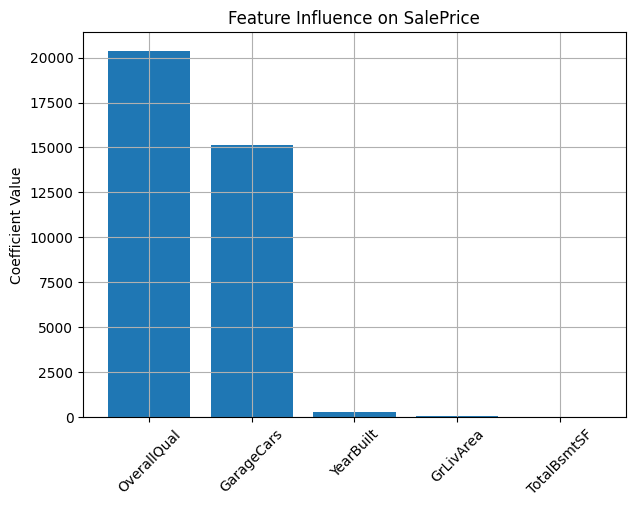

In [33]:
coeffs = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(7,5))
plt.bar(coeffs["Feature"], coeffs["Coefficient"])
plt.title("Feature Influence on SalePrice")
plt.xticks(rotation=45)
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.show()

## The home price model has an average error of 39,763. Its predictions follow the general trend but show significant spread, especially for expensive homes. The top features driving price up are year built, living area, overall quality, garage size, and basement area.

In [42]:
median_price = df["SalePrice"].median()
df["HighPrice"] = (df["SalePrice"] > median_price).astype(int)

features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "YearBuilt"]
X = df[features].fillna(df[features].median())
y = df["HighPrice"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9246575342465754
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       161
           1       0.91      0.92      0.92       131

    accuracy                           0.92       292
   macro avg       0.92      0.92      0.92       292
weighted avg       0.92      0.92      0.92       292



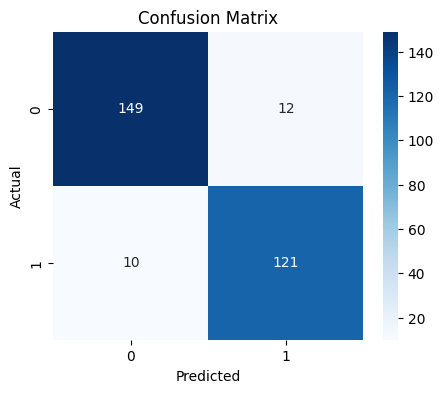

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

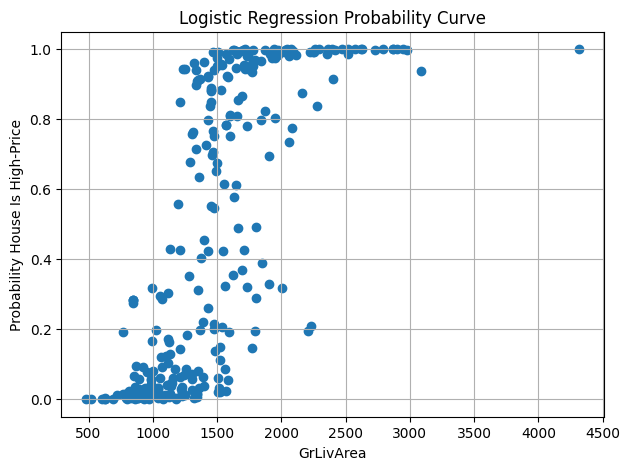

In [44]:
y_prob = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(7,5))
plt.scatter(X_test["GrLivArea"], y_prob)
plt.xlabel("GrLivArea")
plt.ylabel("Probability House Is High-Price")
plt.title("Logistic Regression Probability Curve")
plt.grid(True)
plt.show()


## Linear regression on the housing dataset shows that features like OverallQual, GrLivArea, and GarageCars are strong predictors of SalePrice, indicating that house quality, living space, and garage capacity significantly influence price. Logistic regression can classify houses into high- or low-priced categories, revealing patterns such as higher-quality neighborhoods and newer homes being more likely to be in the high-price class. Visualizations, such as scatter plots with regression lines or bar plots for classification probabilities, make these relationships clear and actionable for decision-making.
